In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
application_train = pd.read_csv('../../../../homecredit/application_train.csv')
POS= pd.read_csv("../../../../homecredit/POS_CASH_balance.csv")
# previous_application = pd.read_csv("../../../homecredit/previous_application.csv")
# credit_card_balance= pd.read_csv("../../../homecredit/credit_card_balance.csv")
# installments_payments = pd.read_csv("../../../homecredit/installments_payments.csv")

##### "Home credit"提供每位客戶的"每筆"小額與現金貸款資料
##### 一個人可能有多筆貸款資料(1個SK_ID_CURR可能有多筆不同的SK_ID_PREV)
##### 相對於申請日期的月份、合約分幾期、還剩幾期、當月合約狀態、逾期天數

In [4]:
POS.sort_values(by=['SK_ID_CURR','SK_ID_PREV'])

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0
...,...,...,...,...,...,...,...,...
6836368,2631384,456255,-21,36.0,31.0,Active,0,0
573934,2729207,456255,-15,6.0,5.0,Active,0,0
8159633,2729207,456255,-16,6.0,6.0,Active,0,0
8514315,2729207,456255,-13,3.0,0.0,Completed,0,0


In [5]:
#該欄位空值佔總比數幾%
POS.isna().sum()/POS.shape[0]

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.002607
CNT_INSTALMENT_FUTURE    0.002608
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

<Axes: xlabel='CNT_INSTALMENT', ylabel='count'>

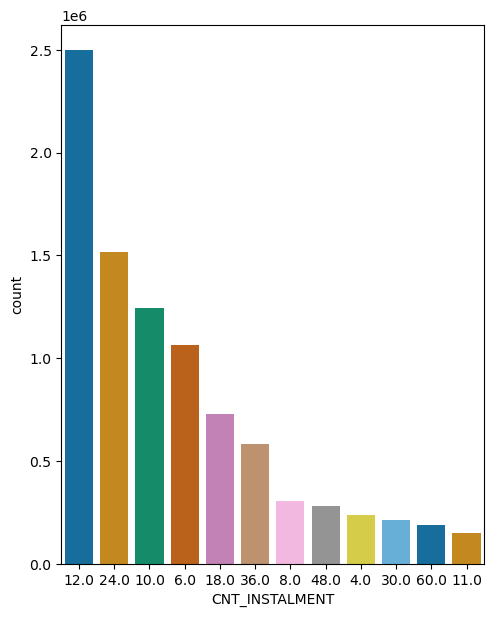

In [6]:
# 申請幾期的分期
fig = plt.figure(figsize=(12, 7))
plt.subplot(121)
sns.countplot(data=POS, x="CNT_INSTALMENT",
              order=POS["CNT_INSTALMENT"].value_counts().index[:12], palette="colorblind")
#由此可知，POS & CASH都是短期貸款(一年期~兩年期居多)